In [1]:
# import the modules that we need
import time
import os
import numpy as np
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.models import Sequential
import keras.backend as K
import matplotlib.pyplot as plt
from keras.layers import Dense, Input
from keras.models import Model
from keras.layers import Layer
from sklearn.cluster import MeanShift
from collections import Counter
# from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, Normalizer
np.set_printoptions(precision=3, suppress=True)

Using TensorFlow backend.


In [2]:
# with this module we can load datasets
def load_nsl_kdd_cup_dataset(filename, n_column=41):
    with open(filename, 'r')as f:
        list1 = []
        list2 = []
        for i in f:
            list1.append(i)
            
        for i in list1:
            i = str(i)
            labels = i.split(sep=',')
            list2.append(labels[:n_column])
        arraylist = np.array(list2)
#         print(arraylist.shape)
        return arraylist

dirs = './NSL_KDD-master'
train_X = load_nsl_kdd_cup_dataset(os.path.join(dirs, 'KDDTrain+.txt'))
test_X  = load_nsl_kdd_cup_dataset(os.path.join(dirs, 'KDDTest+.txt'))
# print(test_X[3])
traindata_labels = load_nsl_kdd_cup_dataset(os.path.join(dirs, 'KDDTrain+.txt'), n_column=42)
testdata_labels = load_nsl_kdd_cup_dataset(os.path.join(dirs, 'KDDTest+.txt'), n_column=42)

In [3]:
print(train_X.shape)
print(test_X.shape)

(125973, 41)
(22544, 41)


In [4]:
# Convert nominal values to numeric values
def convert_nominal_to_numerical(sets):
    list1 = []
    col1, col2, col3 = [], [], []
    for i in sets:
        # print(i[1])
        if i[1] == 'tcp':
            i[1] = 1
        elif i[1] == 'udp':
            i[1] = 2
        elif i[1] == 'icmp':
            i[1] = 3

        if i[2] == 'http':
            i[2] = 1
        elif i[2] == 'private':
            i[2] = 2
        elif i[2] == 'domain_u':
            i[2] = 3
        elif i[2] == 'smtp':
            i[2] = 4
        elif i[2] == 'ftp_data':
            i[2] = 5
        elif i[2] == 'eco_i':
            i[2] = 6
        elif i[2] == 'other':
            i[2] = 7
        elif i[2] == 'ecr_i':
            i[2] = 8
        elif i[2] == 'telnet':
            i[2] = 9
        elif i[2] == 'finger':
            i[2] = 10
        elif i[2] == 'ftp':
            i[2] = 11
        elif i[2] == 'auth':
            i[2] = 12
        elif i[2] == 'Z39_50':
            i[2] = 13
        elif i[2] == 'uucp':
            i[2] = 14
        elif i[2] == 'courier':
            i[2] = 15
        elif i[2] == 'bgp':
            i[2] = 16
        elif i[2] == 'whois':
            i[2] = 17
        elif i[2] == 'uucp_path':
            i[2] = 18
        elif i[2] == 'iso_tsap':
            i[2] = 19
        elif i[2] == 'time':
            i[2] = 20
        elif i[2] == 'imap4':
            i[2] = 21
        elif i[2] == 'nnsp':
            i[2] = 22
        elif i[2] == 'vmnet':
            i[2] = 23
        elif i[2] == 'urp_i':
            i[2] = 24
        elif i[2] == 'domain':
            i[2] = 25
        elif i[2] == 'ctf':
            i[2] = 26
        elif i[2] == 'csnet_ns':
            i[2] = 27
        elif i[2] == 'supdup':
            i[2] = 28
        elif i[2] == 'discard':
            i[2] = 29
        elif i[2] == 'http_443':
            i[2] = 30
        elif i[2] == 'daytime':
            i[2] = 31
        elif i[2] == 'gopher':
            i[2] = 32
        elif i[2] == 'efs':
            i[2] = 33
        elif i[2] == 'systat':
            i[2] = 34
        elif i[2] == 'link':
            i[2] = 35
        elif i[2] == 'exec':
            i[2] = 36
        elif i[2] == 'hostnames':
            i[2] = 37
        elif i[2] == 'name':
            i[2] = 38
        elif i[2] == 'mtp':
            i[2] = 39
        elif i[2] == 'echo':
            i[2] = 40
        elif i[2] == 'klogin':
            i[2] = 41
        elif i[2] == 'login':
            i[2] = 42
        elif i[2] == 'ldap':
            i[2] = 43
        elif i[2] == 'netbios_dgm':
            i[2] = 44
        elif i[2] == 'sunrpc':
            i[2] = 45
        elif i[2] == 'netbios_ssn':
            i[2] = 46
        elif i[2] == 'netstat':
            i[2] = 47
        elif i[2] == 'netbios_ns':
            i[2] = 48
        elif i[2] == 'ssh':
            i[2] = 49
        elif i[2] == 'kshell':
            i[2] = 50
        elif i[2] == 'nntp':
            i[2] = 51
        elif i[2] == 'pop_3':
            i[2] = 52
        elif i[2] == 'sql_net':
            i[2] = 53
        elif i[2] == 'IRC':
            i[2] = 54
        elif i[2] == 'ntp_u':
            i[2] = 55
        elif i[2] == 'rje':
            i[2] = 56
        elif i[2] == 'remote_job':
            i[2] = 57
        elif i[2] == 'pop_2':
            i[2] = 58
        elif i[2] == 'X11':
            i[2] = 59
        elif i[2] == 'printer':
            i[2] = 60
        elif i[2] == 'shell':
            i[2] = 61
        elif i[2] == 'urh_i':
            i[2] = 62
        elif i[2] == 'tim_i':
            i[2] = 63
        elif i[2] == 'red_i':
            i[2] = 64
        elif i[2] == 'pm_dump':
            i[2] = 65
        elif i[2] == 'tftp_u':
            i[2] = 66
        elif i[2] == 'http_8001':
            i[2] = 67
        elif i[2] == 'aol':
            i[2] = 68
        elif i[2] == 'harvest':
            i[2] = 69
        elif i[2] == 'http_2784':
            i[2] = 70

        if i[3] == 'SF':
            i[3] = 1
        elif i[3] == 'S0':
            i[3] = 2
        elif i[3] == 'REJ':
            i[3] = 3
        elif i[3] == 'RSTR':
            i[3] = 4
        elif i[3] == 'RSTO':
            i[3] = 5
        elif i[3] == 'S1':
            i[3] = 6
        elif i[3] == 'SH':
            i[3] = 7
        elif i[3] == 'S2':
            i[3] = 8
        elif i[3] == 'RSTOS0':
            i[3] = 9
        elif i[3] == 'S3':
            i[3] = 10
        elif i[3] == 'OTH':
            i[3] = 11

        # print(i)
        list1.append(i)
        col1.append(i[1])
        col2.append(i[2])
        col3.append(i[3])
    return list1, col1, col2, col3


In [5]:
def convert_list_to_array(list1):
    arrays = np.array(list1)
    return arrays

In [6]:
def plots(value1, value2, loss_or_acc, epochs):
    plt.plot(epochs, value1, 'b', label='training %s'%loss_or_acc)
    plt.plot(epochs, value2, 'bo', label='validation %s'%loss_or_acc)
    plt.xlabel('Epochs')
    plt.ylabel('%s'%loss_or_acc)
    if loss_or_acc == 'Accuracy' or loss_or_acc == 'accuracy' or loss_or_acc == 'acc':
        plt.axis([0, 40, 0, 1.1])
    plt.title('Training and validation %s'%loss_or_acc)
    plt.legend()
    plt.show()

In [7]:
def make_cluster(labels_with_cluster, num_cluster, n_column):
    array_cluster = np.copy(labels_with_cluster)
#     print(array_cluster.shape)
    clusters = []
    for index in range(len(array_cluster)):
        if array_cluster[index, n_column] == num_cluster:
            clusters.append(array_cluster[index])
    return convert_list_to_array(clusters)

In [8]:
def cut_cluster_column(cluster_with_cluster_label, cluster_col_num):
    list1 = []
    for index in cluster_with_cluster_label:
        list1.append(index[:cluster_col_num])
    return convert_list_to_array(list1)

In [9]:
# convert nominal labels to numeric
def nominal_labels_2_numeric(labels):
    lst_label = np.copy(labels)
    for i in range(len(lst_label)):
        if lst_label[i] == 'normal':
            lst_label[i] = 0
        if lst_label[i] == 'dos':
            lst_label[i] = 1
        if lst_label[i] == 'probe':
            lst_label[i] = 2
        if lst_label[i] == 'r2l':
            lst_label[i] = 3
        if lst_label[i] == 'u2r':
            lst_label[i] = 4
    return(convert_list_to_array(list1=lst_label))

In [10]:
def cut_label(cluster_with_label, cut_col):
    lst = []
    for i in cluster_with_label:
        lst.append(i[cut_col:cut_col+1])
    return convert_list_to_array(lst)
        

In [11]:
def get_labels(data):
    label_list = []
    for i1 in data:
        label_list.append(i1[41])
    return label_list

In [12]:
# make all kind of attack to dos, prob, u2r and r2l
def convert_labels_to_5_class(data):
    lst_label = np.copy(data)
    for index in range(len(lst_label)):
        if lst_label[index] == 'back' or lst_label[index] =='land' or lst_label[index] == 'neptune' or lst_label[index] == 'pod' or lst_label[index] == 'smurf' or lst_label[index] == 'teardrop' or lst_label[index] == 'apache2' or lst_label[index] == 'udpstorm' or lst_label[index] == 'processtable' or lst_label[index] == 'worm' or lst_label[index] == 'mailbomb':
            lst_label[index] = 'dos'
                
        if lst_label[index] == 'buffer_overflow' or lst_label[index] == 'loadmodule' or lst_label[index] == 'perl' or lst_label[index] ==  'rootkit' or lst_label[index] == 'sqlattack' or lst_label[index] == 'xterm' or lst_label[index] == 'ps':
            lst_label[index] = 'u2r'
                
        if lst_label[index] == 'guess_passwd' or lst_label[index] == 'ftp_write' or lst_label[index] == 'imap' or lst_label[index] == 'phf' or lst_label[index] == 'multihop' or lst_label[index] == 'spy' or lst_label[index] == 'warezclient' or lst_label[index] == 'warezmaster' or lst_label[index] == 'xlock' or lst_label[index] == 'xsnoop' or lst_label[index] == 'snmpguess' or lst_label[index] == 'snmpgetattack' or lst_label[index] == 'httptunnel' or lst_label[index] == 'sendmail' or lst_label[index] == 'named':
            lst_label[index] = 'r2l'
            
        if lst_label[index] == 'ipsweep' or lst_label[index] == 'nmap' or lst_label[index] == 'portsweep' or lst_label[index] == 'satan' or lst_label[index] == 'mscan' or lst_label[index] == 'saint':
            lst_label[index] = 'probe'
    return lst_label

In [13]:
# in this module initializer will initiate the weights for networks
# we define 2  kind of networks, use them and choose the one that better
# k fold is for determine hyperparameters


# def newsig(weight_matrix):
#     return 10 * (1 / (1 + (K.exp(-0.0001 * weight_matrix))))
def initializer(weight_matrix):
    return K.random_uniform(shape=weight_matrix, minval=-1.2, maxval=0.8, seed=(142))

from keras.optimizers import Adam, SGD
adam = Adam(lr=0.001, beta_1=0.8, beta_2=0.899, epsilon=None, decay=0.0, amsgrad=False)
sgd = SGD(lr=0.01, momentum=0.2, decay=0.0, nesterov=False)


def build_model(loss_function):
    model = Sequential()
    model.add(Dense(25, activation='relu',
                    kernel_initializer=initializer,
                    bias_initializer='zeros',
                    input_shape=(25, )))
    model.add(Dense(15, activation='relu',
                    kernel_initializer=initializer,
                    bias_initializer='zeros'))
    
    model.add(Dense(5, activation='sigmoid',
                    kernel_initializer=initializer,
                    bias_initializer='zeros'))
    
    model.compile(optimizer=adam, loss=loss_function, metrics=['accuracy'])
    return model



def build_model2(loss_function):
    model2 = Sequential()
    model2.add(Dense(18, activation='sigmoid',
                     kernel_initializer=initializer,
                     bias_initializer='zeros',
                     input_shape=(41, )))
    model2.add(Dense(5, activation='linear',
                     kernel_initializer=initializer,
                     bias_initializer='zeros'))
    
    model2.compile(optimizer=sgd, loss=loss_function, metrics=['accuracy'])
    return model2




def k_fold(k_num, train_datas, train_labels, epochs, build_models, loss_func='categorical_crossentropy',
           batch_size=128):
    num_validation_samples = len(train_datas) // k_num
    loss_list = []
    val_loss_list = []
    acc_list = []
    val_acc_list = []
    all_scores = []
    print('training... please wait')
    for i in range(k_num):
        val_datas = train_datas[i * num_validation_samples:(i + 1) * num_validation_samples]
        val_labels = train_labels[i * num_validation_samples:(i + 1) * num_validation_samples]
        
        partial_train_datas = np.concatenate([train_datas[:i * num_validation_samples],
                                              train_datas[(i + 1) * num_validation_samples:]],
                                             axis=0)
        partial_train_labels = np.concatenate([train_labels[:i * num_validation_samples],
                                               train_labels[(i + 1) * num_validation_samples:]],
                                              axis=0)
        network = build_models(loss_function=loss_func)
        historys = network.fit(partial_train_datas, partial_train_labels,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0,
                              validation_data=(val_datas, val_labels))
        _, val_accus = network.evaluate(val_datas, val_labels)
        losses = historys.history['loss']
        val_losses = historys.history['val_loss']
        accs = historys.history['acc']
        val_accs = historys.history['val_acc']
        
        loss_list.append(losses)
        val_loss_list.append(val_losses)
        acc_list.append(accs)
        val_acc_list.append(val_accs)
        all_scores.append(val_accus)
    print('train finished')
    return all_scores, loss_list, val_loss_list, acc_list, val_acc_list

def averages(data, num_epochs):
    avrg = [np.mean([x[i] for x in data]) for i in range(num_epochs)]
    return avrg

In [14]:
# this module calculate the metrics such as precision, accuracy,recall and ...

def metrics_binary_1node(y_pred, y_test):
    if not np.array(y_pred).shape[0] == np.array(y_test).shape[0]:
        print('Error, prediction shape must be equal to y_test shape')
        exit(-1)

    TP = 0.
    TN = 0.
    FP = 0.
    FN = 0.
#     for i in range(len(y_test)):
    for i in range(y_test.shape[0]):
        if np.argmax(y_pred[i]) == np.argmax(y_test[i]):
            if np.argmax(y_test[i]) == 0:
                TN += 1
            else:
                TP += 1
        else:
            if np.argmax(y_test[i]) == 0:
                FP += 1
            else:
                FN += 1
    confuion_matrix = np.array([[TP, FP], [FN, TN]])
    P = TP + FN
    N = FP + TN
    P_hat = TP + FP
    N_hat = FN + TN
    # precision = positive predictive value (PPV) = TP / P-hat
    precision = TP / (P_hat + 1e-7)  # P_hat = TP + FP -> TP / (TP + FP)
    print('precision', precision)
    # False pos rate = false acceptance = type I error rate = FP / N = 1-spec
    FPR = FP / (N + 1e-7)  # -> FP / (FP + TN)
    print('FPR', FPR)
    # Sensitivity = recall = True pos rate = hit rate = TP / P = 1-FNR
    TPR = sensitivity = recall = TP / (P + 1e-7)  # -> TP / (TP + FN)
    # TPR = sensitivity  # Recall
    print('TPR', TPR)
    print('Recall', recall)
    # False neg rate = false rejection = type II error rate = FN / P = 1-TPR
    FNR = FN / (P + 1e-7)  # -> FN / (TP + FN)
    print('FNR', FNR)
    # Specificity = TN / N = 1 - FPR
    specificity = TN / (N + 1e-7)  # -> TN / (FP + TN)
    print('specificity', specificity)
    # Accuracy = (TP+TN)/(P+N) -> same as success rate
    accuracy = (TP + TN) / (P + N + 1e-7)  # -> (TP + TN) / (TP + FN + FP + TN)
    print('accuracy', accuracy)
    # F-score or F-measure is the harmonic mean of the precision and recall
    # F_score = (2 * precision * TPR) / (precision + TPR)
    F_score = (2.0 * precision * recall) / (precision + recall + 1e-7)
    print('F_score', F_score)
    print('FN', FN)
    print('FP', FP)
    print('TP', TP)
    print('TN', TN)
    
    observed_accuracy = (TP + TN) / (TP + FP + FN + TN)
    po=observed_accuracy
    denominator=np.power((TP + FP + FN + TN),2)
    expected_accuracy = [(TP + FP)*(TP + FN) + (FN + TN)*(FP + TN)] / denominator
    pe=expected_accuracy
    Cohens_kappa = (po - pe)/(1 - pe)
    print('Cohens_kappa',Cohens_kappa)

    return F_score,accuracy,specificity,FNR,TPR,FPR,precision,Cohens_kappa

In [15]:
import tensorflow as tf
import random as rn

os.environ['PYTHONHASHSEED'] = '0'

# Setting the seed for numpy-generated random numbers
np.random.seed(37)

# Setting the seed for python random numbers
rn.seed(1254)

# Setting the graph-level random seed.
tf.set_random_seed(89)

from keras import backend as K

session_conf = tf.ConfigProto(
      intra_op_parallelism_threads=1,
      inter_op_parallelism_threads=1)

#Force Tensorflow to use a single thread
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)

K.set_session(sess)

In [16]:
X_train_data, _, _, _ = convert_nominal_to_numerical(train_X)
X_test_data, _, _, _ = convert_nominal_to_numerical(test_X)

In [17]:
print(X_train_data[12])
print(np.array(X_test_data).shape)

['0' '1' '1' '1' '287' '2251' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '3' '7' '0.00' '0.00' '0.00' '0.00' '1.00' '0.00'
 '0.43' '8' '219' '1.00' '0.00' '0.12' '0.03' '0.00' '0.00' '0.00' '0.00']
(22544, 41)


In [18]:
# define normalizer
normalizer_scalers = MinMaxScaler()

In [19]:
normalizer_scalers.fit(X_train_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
normalizer_normalized_X = normalizer_scalers.transform(X_train_data)
normalizer_normalized_X_test = normalizer_scalers.transform(X_test_data)
normalizer_normalized_X = normalizer_normalized_X.astype('float32')
normalizer_normalized_X_test = normalizer_normalized_X_test.astype('float32')

In [21]:
print(normalizer_normalized_X[12])

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.006 0.014
 0.    0.    0.    0.    1.    0.    0.43  0.031 0.859 1.    0.    0.12
 0.03  0.    0.    0.    0.   ]


In [22]:
import random
import operator
import math

In [23]:
train_labels_list = get_labels(traindata_labels)
test_labels_list = get_labels(testdata_labels)
train_labels = convert_labels_to_5_class(train_labels_list)
test_labels = convert_labels_to_5_class(test_labels_list)

train_numerical_label = nominal_labels_2_numeric(train_labels)
test_numerical_label = nominal_labels_2_numeric(test_labels)

In [24]:
class_labels = np.copy(train_numerical_label)

In [25]:
# define fuzzy clustering

# df_full = pd.read_csv("SPECTF_New.csv")
# columns = list(df_full.columns)
# features = columns[:len(columns)-1]
# class_labels = list(df_full[columns[-1]])
# df = df_full[features]

# Number of Attributes
num_attr = 41

# Number of Clusters
k = 6

# Maximum number of iterations
MAX_ITER = 50

# Number of data points
n = len(normalizer_normalized_X)

# Fuzzy parameter
m = 2.00

def initializeMembershipMatrix():
    membership_mat = list()
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list)
    return membership_mat


def calculateClusterCenter(membership_mat, data):
    cluster_mem_val = list(zip(*membership_mat))
    cluster_centers = list()
    for j in range(k):
        x = list(cluster_mem_val[j])
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = list()
        for i in range(n):
            data_point = list(data[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = list(map(sum, list(zip(*temp_num))))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers


def updateMembershipValue(membership_mat, cluster_centers, data):
    p = float(2/(m-1))
    for i in range(n):
        x = list(data[i])
        distances = [np.linalg.norm(list(map(operator.sub, x, cluster_centers[j]))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)       
    return membership_mat


def getClusters(membership_mat):
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels


def fuzzyCMeansClustering():
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr <= MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat, normalizer_normalized_X)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers, normalizer_normalized_X)
        cluster_labels = getClusters(membership_mat)
        curr += 1
#     print(membership_mat)
    return cluster_labels, cluster_centers

In [26]:
t1 = time.time()
labels, centers = fuzzyCMeansClustering()
t2 = time.time()
print(t2 - t1)

13184.142191648483


In [27]:
# acc, precision, recall = accuracy(labels, class_labels, normalizer_normalized_X)

# print("Accuracy = " + str(acc))
# print("Precision = " + str(precision))
# print("Recall = " + str(recall))

In [28]:
print(Counter(labels))

Counter({1: 34936, 4: 25263, 3: 20678, 0: 18316, 5: 14669, 2: 12111})


In [29]:
cp_labels = np.copy(labels)
cp_centers = np.copy(centers)

In [30]:
train_labels = np.reshape(cp_labels, (-1, 1))
reshaped_train_numerical_label = np.reshape(train_numerical_label, (-1, 1))
stacked_train_array = np.hstack((normalizer_normalized_X, reshaped_train_numerical_label, train_labels))

In [31]:
print(stacked_train_array.shape)

(125973, 43)


In [32]:
# make train cluster
cluster_train_0 = make_cluster(stacked_train_array, str(0), 42)
cluster_train_1 = make_cluster(stacked_train_array, str(1), 42)
cluster_train_2 = make_cluster(stacked_train_array, str(2), 42)
cluster_train_3 = make_cluster(stacked_train_array, str(3), 42)
cluster_train_4 = make_cluster(stacked_train_array, str(4), 42)
cluster_train_5 = make_cluster(stacked_train_array, str(5), 42)

cluster_train_0_ready = cut_cluster_column(cluster_train_0, 41)
cluster_train_1_ready = cut_cluster_column(cluster_train_1, 41)
cluster_train_2_ready = cut_cluster_column(cluster_train_2, 41)
cluster_train_3_ready = cut_cluster_column(cluster_train_3, 41)
cluster_train_4_ready = cut_cluster_column(cluster_train_4, 41)
cluster_train_5_ready = cut_cluster_column(cluster_train_5, 41)

In [33]:
print(cluster_train_0_ready.shape)

(18316, 41)


In [34]:
# label ready for each cluster
label_train0 = cut_label(cluster_train_0, 41) 
label_train1 = cut_label(cluster_train_1, 41)
label_train2 = cut_label(cluster_train_2, 41)
label_train3 = cut_label(cluster_train_3, 41)
label_train4 = cut_label(cluster_train_4, 41)
label_train5 = cut_label(cluster_train_5, 41)

cat_train_numerical_label = to_categorical(train_numerical_label, num_classes=5)

In [35]:
cat_test_numerical_label = to_categorical(test_numerical_label, num_classes=5)

In [36]:
print(label_train0.shape)

(18316, 1)


In [37]:
cat_label_train0 = to_categorical(label_train0, num_classes=5)
cat_label_train1 = to_categorical(label_train1, num_classes=5)
cat_label_train2 = to_categorical(label_train2, num_classes=5)
cat_label_train3 = to_categorical(label_train3, num_classes=5)
cat_label_train4 = to_categorical(label_train4, num_classes=5)
cat_label_train5 = to_categorical(label_train5, num_classes=5)

In [38]:
# faze train
# cluster 0
scores0, loss0, val_loss0, acc0, val_acc0 = k_fold(5, cluster_train_0_ready, cat_label_train0, 40, build_model2, 'mse', 128)

training... please wait
3663/3663 [==============================] - 0s 41us/step
train finished


In [39]:
print(np.mean(scores0))

0.7995631996087614


In [40]:
epochs = range(len(loss0[0]))
avg_loss0 = averages(loss0, 40)
avg_val_loss0 = averages(val_loss0, 40)
avg_acc0 = averages(acc0, 40)
avg_val_acc0 = averages(val_acc0, 40) 

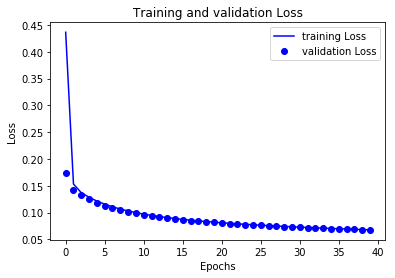

In [41]:
plots(avg_loss0, avg_val_loss0, 'Loss', epochs)

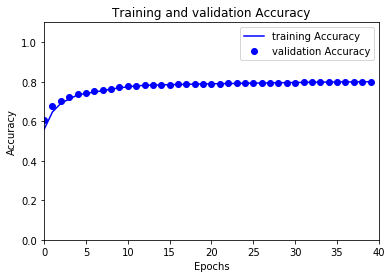

In [42]:
plots(avg_acc0, avg_val_acc0, 'Accuracy', epochs)

In [43]:
ms_train_c0_network = 0
ms_train_c0_network = build_model2('mse')
ms_train_c0_network.fit(cluster_train_0_ready, cat_label_train0, epochs=60, batch_size=32)

Epoch 1/60
18316/18316 [==============================] - 1s 59us/step - loss: 0.1954 - acc: 0.6652
Epoch 2/60
18316/18316 [==============================] - 1s 51us/step - loss: 0.1073 - acc: 0.7551
Epoch 3/60
18316/18316 [==============================] - 1s 54us/step - loss: 0.0929 - acc: 0.7795
Epoch 4/60
18316/18316 [==============================] - 1s 52us/step - loss: 0.0846 - acc: 0.7859
Epoch 5/60
18316/18316 [==============================] - 1s 51us/step - loss: 0.0791 - acc: 0.7910
Epoch 6/60
18316/18316 [==============================] - 1s 54us/step - loss: 0.0750 - acc: 0.7937
Epoch 7/60
18316/18316 [==============================] - 1s 50us/step - loss: 0.0717 - acc: 0.7973
Epoch 8/60
18316/18316 [==============================] - 1s 52us/step - loss: 0.0689 - acc: 0.7990
Epoch 9/60
18316/18316 [==============================] - 1s 53us/step - loss: 0.0665 - acc: 0.8008
Epoch 10/60
18316/18316 [==============================] - 1s 50us/step - loss: 0.0644 - acc: 0.8090

In [44]:
print(ms_train_c0_network.evaluate(normalizer_normalized_X, cat_train_numerical_label))

125973/125973 [==============================] - 2s 12us/step
[0.09048907844355494, 0.7519627221734628]


In [45]:
# cluster 1
scores1, loss1, val_loss1, acc1, val_acc1 = k_fold(5, cluster_train_1_ready, cat_label_train1, 40, build_model2, 'mse', 128)

training... please wait
6987/6987 [==============================] - 0s 38us/step
train finished


In [46]:
print(np.mean(scores1))

0.9859453270529854


In [47]:
avg_loss1 = averages(loss1, 40)
avg_val_loss1 = averages(val_loss1, 40)
avg_acc1 = averages(acc1, 40)
avg_val_acc1 = averages(val_acc1, 40) 

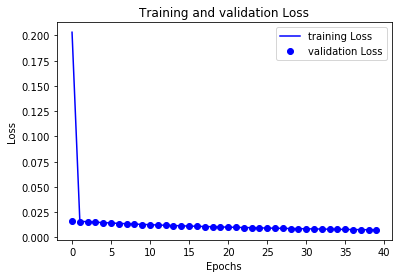

In [48]:
plots(avg_loss1, avg_val_loss1, 'Loss', epochs)

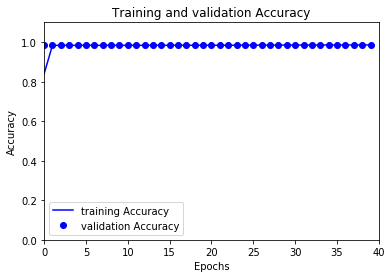

In [49]:
plots(avg_acc1, avg_val_acc1, 'Accuracy', epochs)

In [50]:
ms_train_c1_network = 0
ms_train_c1_network = build_model2('mse')
ms_train_c1_network.fit(cluster_train_1_ready, cat_label_train1, epochs=40, batch_size=128)

Epoch 1/40
34936/34936 [==============================] - 1s 38us/step - loss: 0.1657 - acc: 0.8673
Epoch 2/40
34936/34936 [==============================] - 1s 31us/step - loss: 0.0158 - acc: 0.9837
Epoch 3/40
34936/34936 [==============================] - 1s 32us/step - loss: 0.0152 - acc: 0.9837
Epoch 4/40
34936/34936 [==============================] - 1s 33us/step - loss: 0.0147 - acc: 0.9837
Epoch 5/40
34936/34936 [==============================] - 1s 33us/step - loss: 0.0142 - acc: 0.9837
Epoch 6/40
34936/34936 [==============================] - 1s 32us/step - loss: 0.0138 - acc: 0.9837
Epoch 7/40
34936/34936 [==============================] - 1s 32us/step - loss: 0.0133 - acc: 0.9837
Epoch 8/40
34936/34936 [==============================] - 1s 32us/step - loss: 0.0129 - acc: 0.9838
Epoch 9/40
34936/34936 [==============================] - 1s 32us/step - loss: 0.0125 - acc: 0.9838
Epoch 10/40
34936/34936 [==============================] - 1s 33us/step - loss: 0.0122 - acc: 0.9838

In [51]:
print(ms_train_c1_network.evaluate(normalizer_normalized_X, cat_train_numerical_label))

125973/125973 [==============================] - 2s 13us/step
[0.13706217454479552, 0.7440721424441683]


In [52]:
# cluster 2
scores2, loss2, val_loss2, acc2, val_acc2 = k_fold(5, cluster_train_2_ready, cat_label_train2, 40, build_model2, 'mse', 128)

training... please wait
2422/2422 [==============================] - 0s 38us/step
train finished


In [53]:
print(np.mean(scores2))

0.9431874483208535


In [54]:
avg_loss2 = averages(loss2, 40)
avg_val_loss2 = averages(val_loss2, 40)
avg_acc2 = averages(acc2, 40)
avg_val_acc2 = averages(val_acc2, 40) 

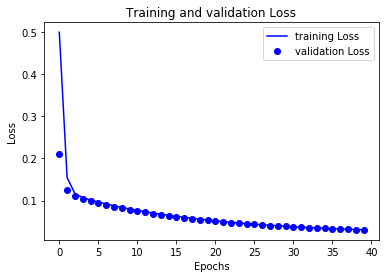

In [55]:
plots(avg_loss2, avg_val_loss2, 'Loss', epochs)

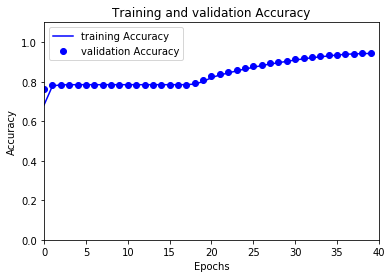

In [56]:
plots(avg_acc2, avg_val_acc2, 'Accuracy', epochs)

In [57]:
ms_train_c2_network = 0
ms_train_c2_network = build_model2('mse')
ms_train_c2_network.fit(cluster_train_2_ready, cat_label_train2, epochs=50, batch_size=32)

Epoch 1/50
12111/12111 [==============================] - 1s 73us/step - loss: 0.1960 - acc: 0.7626
Epoch 2/50
12111/12111 [==============================] - 1s 54us/step - loss: 0.0882 - acc: 0.7846
Epoch 3/50
12111/12111 [==============================] - 1s 57us/step - loss: 0.0709 - acc: 0.7846
Epoch 4/50
12111/12111 [==============================] - 1s 54us/step - loss: 0.0583 - acc: 0.7872
Epoch 5/50
12111/12111 [==============================] - 1s 55us/step - loss: 0.0488 - acc: 0.8434
Epoch 6/50
12111/12111 [==============================] - 1s 53us/step - loss: 0.0416 - acc: 0.8873
Epoch 7/50
12111/12111 [==============================] - 1s 55us/step - loss: 0.0363 - acc: 0.9198
Epoch 8/50
12111/12111 [==============================] - 1s 51us/step - loss: 0.0322 - acc: 0.9388
Epoch 9/50
12111/12111 [==============================] - 1s 53us/step - loss: 0.0292 - acc: 0.9443
Epoch 10/50
12111/12111 [==============================] - 1s 54us/step - loss: 0.0269 - acc: 0.9464

In [58]:
print(ms_train_c2_network.evaluate(normalizer_normalized_X, cat_train_numerical_label))

125973/125973 [==============================] - 2s 14us/step
[0.18732875772108873, 0.8015050844233257]


In [59]:
# cluster 3
scores3, loss3, val_loss3, acc3, val_acc3 = k_fold(5, cluster_train_3_ready, cat_label_train3, 40, build_model2, 'mse', 128)

training... please wait
4135/4135 [==============================] - 0s 43us/step
train finished


In [60]:
print(np.mean(scores3))

0.9643047158432699


In [61]:
avg_loss3 = averages(loss3, 40)
avg_val_loss3 = averages(val_loss3, 40)
avg_acc3 = averages(acc3, 40)
avg_val_acc3 = averages(val_acc3, 40) 

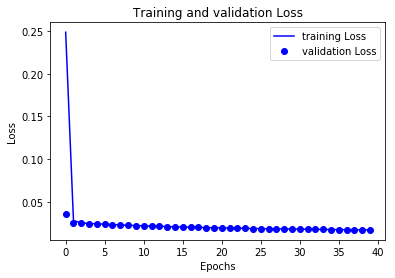

In [62]:
plots(avg_loss3, avg_val_loss3, 'Loss', epochs)

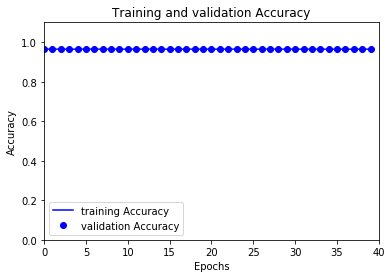

In [63]:
plots(avg_acc3, avg_val_acc3, 'Accuracy', epochs)

In [64]:
ms_train_c3_network = 0
ms_train_c3_network = build_model2('mse')
ms_train_c3_network.fit(cluster_train_3_ready, cat_label_train3, epochs=40, batch_size=8)

Epoch 1/40
20678/20678 [==============================] - 3s 163us/step - loss: 0.0336 - acc: 0.9644
Epoch 2/40
20678/20678 [==============================] - 3s 140us/step - loss: 0.0181 - acc: 0.9644
Epoch 3/40
20678/20678 [==============================] - 3s 145us/step - loss: 0.0164 - acc: 0.9643
Epoch 4/40
20678/20678 [==============================] - 3s 138us/step - loss: 0.0155 - acc: 0.9643
Epoch 5/40
20678/20678 [==============================] - 3s 142us/step - loss: 0.0149 - acc: 0.9643
Epoch 6/40
20678/20678 [==============================] - 3s 147us/step - loss: 0.0145 - acc: 0.9643
Epoch 7/40
20678/20678 [==============================] - 3s 142us/step - loss: 0.0141 - acc: 0.9643
Epoch 8/40
20678/20678 [==============================] - 3s 141us/step - loss: 0.0138 - acc: 0.9644
Epoch 9/40
20678/20678 [==============================] - 3s 145us/step - loss: 0.0136 - acc: 0.9644
Epoch 10/40
20678/20678 [==============================] - 3s 141us/step - loss: 0.0134 - a

In [65]:
print(ms_train_c3_network.evaluate(normalizer_normalized_X, cat_train_numerical_label))

125973/125973 [==============================] - 2s 15us/step
[0.1501913111749672, 0.5240964333664899]


In [66]:
# cluster 4
scores4, loss4, val_loss4, acc4, val_acc4 = k_fold(5, cluster_train_4_ready, cat_label_train4, 40, build_model2, 'mse', 128)

training... please wait
5052/5052 [==============================] - 0s 38us/step
train finished


In [67]:
print(np.mean(scores4))

0.9585510689402419


In [68]:
avg_loss4 = averages(loss4, 40)
avg_val_loss4 = averages(val_loss4, 40)
avg_acc4 = averages(acc4, 40)
avg_val_acc4 = averages(val_acc4, 40) 

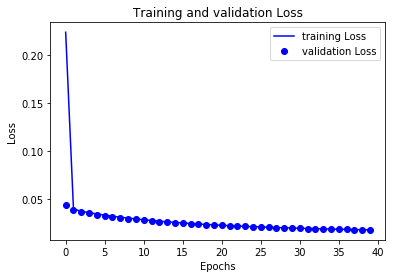

In [69]:
plots(avg_loss4, avg_val_loss4, 'Loss', epochs)

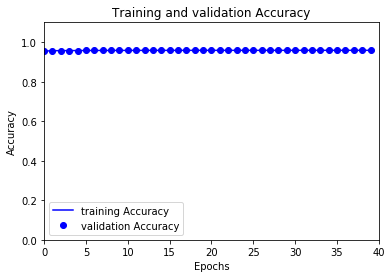

In [70]:
plots(avg_acc4, avg_val_acc4, 'Accuracy', epochs)

In [71]:
ms_train_c4_network = 0
ms_train_c4_network = build_model2('mse')
ms_train_c4_network.fit(cluster_train_4_ready, cat_label_train4, epochs=40, batch_size=8)

Epoch 1/40
25263/25263 [==============================] - 4s 162us/step - loss: 0.0394 - acc: 0.9576
Epoch 2/40
25263/25263 [==============================] - 4s 148us/step - loss: 0.0202 - acc: 0.9584
Epoch 3/40
25263/25263 [==============================] - 4s 145us/step - loss: 0.0169 - acc: 0.9586
Epoch 4/40
25263/25263 [==============================] - 4s 145us/step - loss: 0.0155 - acc: 0.9585
Epoch 5/40
25263/25263 [==============================] - 4s 148us/step - loss: 0.0147 - acc: 0.9582
Epoch 6/40
25263/25263 [==============================] - 4s 148us/step - loss: 0.0141 - acc: 0.9582
Epoch 7/40
25263/25263 [==============================] - 4s 142us/step - loss: 0.0137 - acc: 0.9581
Epoch 8/40
25263/25263 [==============================] - 4s 144us/step - loss: 0.0134 - acc: 0.9582
Epoch 9/40
25263/25263 [==============================] - 4s 145us/step - loss: 0.0131 - acc: 0.9583
Epoch 10/40
25263/25263 [==============================] - 4s 141us/step - loss: 0.0129 - a

In [72]:
print(ms_train_c4_network.evaluate(normalizer_normalized_X, cat_train_numerical_label))

125973/125973 [==============================] - 2s 16us/step
[0.08671279893423829, 0.8042755193577957]


In [73]:
# cluster 5
scores5, loss5, val_loss5, acc5, val_acc5 = k_fold(5, cluster_train_5_ready, cat_label_train5, 40, build_model2, 'mse', 128)

training... please wait
2933/2933 [==============================] - 0s 41us/step
train finished


In [74]:
print(np.mean(scores5))

0.9568360041076318


In [75]:
avg_loss5 = averages(loss5, 40)
avg_val_loss5 = averages(val_loss5, 40)
avg_acc5 = averages(acc5, 40)
avg_val_acc5 = averages(val_acc5, 40) 

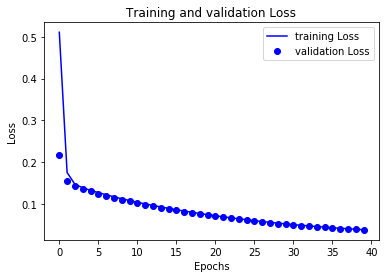

In [76]:
plots(avg_loss5, avg_val_loss5, 'Loss', epochs)

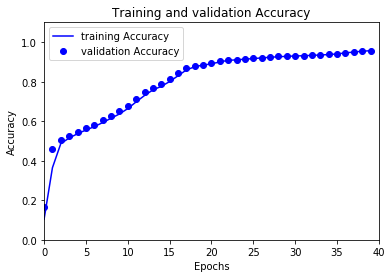

In [77]:
plots(avg_acc5, avg_val_acc5, 'Accuracy', epochs)

In [78]:
ms_train_c5_network = 0
ms_train_c5_network = build_model2('mse')
ms_train_c5_network.fit(cluster_train_5_ready, cat_label_train5, epochs=60, batch_size=64)

Epoch 1/60
14669/14669 [==============================] - 1s 72us/step - loss: 0.3042 - acc: 0.2811
Epoch 2/60
14669/14669 [==============================] - 1s 44us/step - loss: 0.1371 - acc: 0.5217
Epoch 3/60
14669/14669 [==============================] - 1s 42us/step - loss: 0.1228 - acc: 0.5672
Epoch 4/60
14669/14669 [==============================] - 1s 42us/step - loss: 0.1110 - acc: 0.6208
Epoch 5/60
14669/14669 [==============================] - 1s 40us/step - loss: 0.1006 - acc: 0.6880
Epoch 6/60
14669/14669 [==============================] - 1s 40us/step - loss: 0.0915 - acc: 0.7592
Epoch 7/60
14669/14669 [==============================] - 1s 41us/step - loss: 0.0833 - acc: 0.8223
Epoch 8/60
14669/14669 [==============================] - 1s 42us/step - loss: 0.0759 - acc: 0.8791
Epoch 9/60
14669/14669 [==============================] - 1s 42us/step - loss: 0.0693 - acc: 0.8973
Epoch 10/60
14669/14669 [==============================] - 1s 41us/step - loss: 0.0633 - acc: 0.9114

In [79]:
print(ms_train_c5_network.evaluate(normalizer_normalized_X, cat_train_numerical_label))

125973/125973 [==============================] - 2s 17us/step
[0.197510378061625, 0.8940249101002564]


In [106]:
prd_c0_0 = ms_train_c0_network.predict(cluster_train_0_ready)
prd_c0_1 = ms_train_c0_network.predict(cluster_train_1_ready)
prd_c0_2 = ms_train_c0_network.predict(cluster_train_2_ready)
prd_c0_3 = ms_train_c0_network.predict(cluster_train_3_ready)
prd_c0_4 = ms_train_c0_network.predict(cluster_train_4_ready)
prd_c0_5 = ms_train_c0_network.predict(cluster_train_5_ready)

prd_c1_0 = ms_train_c1_network.predict(cluster_train_0_ready)
prd_c1_1 = ms_train_c1_network.predict(cluster_train_1_ready)
prd_c1_2 = ms_train_c1_network.predict(cluster_train_2_ready)
prd_c1_3 = ms_train_c1_network.predict(cluster_train_3_ready)
prd_c1_4 = ms_train_c1_network.predict(cluster_train_4_ready)
prd_c1_5 = ms_train_c1_network.predict(cluster_train_5_ready)

prd_c2_0 = ms_train_c2_network.predict(cluster_train_0_ready)
prd_c2_1 = ms_train_c2_network.predict(cluster_train_1_ready)
prd_c2_2 = ms_train_c2_network.predict(cluster_train_2_ready)
prd_c2_3 = ms_train_c2_network.predict(cluster_train_3_ready)
prd_c2_4 = ms_train_c2_network.predict(cluster_train_4_ready)
prd_c2_5 = ms_train_c2_network.predict(cluster_train_5_ready)

prd_c3_0 = ms_train_c3_network.predict(cluster_train_0_ready)
prd_c3_1 = ms_train_c3_network.predict(cluster_train_1_ready)
prd_c3_2 = ms_train_c3_network.predict(cluster_train_2_ready)
prd_c3_3 = ms_train_c3_network.predict(cluster_train_3_ready)
prd_c3_4 = ms_train_c3_network.predict(cluster_train_4_ready)
prd_c3_5 = ms_train_c3_network.predict(cluster_train_5_ready)

prd_c4_0 = ms_train_c4_network.predict(cluster_train_0_ready)
prd_c4_1 = ms_train_c4_network.predict(cluster_train_1_ready)
prd_c4_2 = ms_train_c4_network.predict(cluster_train_2_ready)
prd_c4_3 = ms_train_c4_network.predict(cluster_train_3_ready)
prd_c4_4 = ms_train_c4_network.predict(cluster_train_4_ready)
prd_c4_5 = ms_train_c4_network.predict(cluster_train_5_ready)

prd_c5_0 = ms_train_c5_network.predict(cluster_train_0_ready)
prd_c5_1 = ms_train_c5_network.predict(cluster_train_1_ready)
prd_c5_2 = ms_train_c5_network.predict(cluster_train_2_ready)
prd_c5_3 = ms_train_c5_network.predict(cluster_train_3_ready)
prd_c5_4 = ms_train_c5_network.predict(cluster_train_4_ready)
prd_c5_5 = ms_train_c5_network.predict(cluster_train_5_ready)

In [107]:
prd_c0_stacked = np.vstack((prd_c0_0, prd_c0_1, prd_c0_2, prd_c0_3, prd_c0_4, prd_c0_5))
prd_c1_stacked = np.vstack((prd_c1_0, prd_c1_1, prd_c1_2, prd_c1_3, prd_c1_4, prd_c1_5))
prd_c2_stacked = np.vstack((prd_c2_0, prd_c2_1, prd_c2_2, prd_c2_3, prd_c2_4, prd_c2_5))
prd_c3_stacked = np.vstack((prd_c3_0, prd_c3_1, prd_c3_2, prd_c3_3, prd_c3_4, prd_c3_5))
prd_c4_stacked = np.vstack((prd_c4_0, prd_c4_1, prd_c4_2, prd_c4_3, prd_c4_4, prd_c4_5))
prd_c5_stacked = np.vstack((prd_c5_0, prd_c5_1, prd_c5_2, prd_c5_3, prd_c5_4, prd_c5_5))

In [108]:
train_data_label = np.vstack((cat_label_train0, cat_label_train1, cat_label_train2, cat_label_train3, cat_label_train4, cat_label_train5))

In [134]:
train_data_label = np.vstack((train_data_label, train_data_label, train_data_label, train_data_label, train_data_label, train_data_label))

In [135]:
train_data_label.shape

(755838, 5)

In [109]:
memb_mat = initializeMembershipMatrix()
upd_memb = np.array(updateMembershipValue(memb_mat, cp_centers, normalizer_normalized_X))

In [110]:
print(np.array(memb_mat).shape)
print(upd_memb.shape)

(125973, 6)
(125973, 6)


In [111]:
upd_memb_fix = np.reshape(upd_memb, (6, 125973))

In [112]:
print(prd_c0_stacked.shape)
print(np.reshape(upd_memb_fix[0], (-1, 1)).shape)

(125973, 5)
(125973, 1)


In [113]:
prd_c0_result = prd_c0_stacked * np.reshape(upd_memb_fix[0], (-1, 1))
prd_c1_result = prd_c1_stacked * np.reshape(upd_memb_fix[1], (-1, 1))
prd_c2_result = prd_c2_stacked * np.reshape(upd_memb_fix[2], (-1, 1))
prd_c3_result = prd_c3_stacked * np.reshape(upd_memb_fix[3], (-1, 1))
prd_c4_result = prd_c4_stacked * np.reshape(upd_memb_fix[4], (-1, 1))
prd_c5_result = prd_c5_stacked * np.reshape(upd_memb_fix[5], (-1, 1))

In [114]:
print(prd_c1_result.shape)

(125973, 5)


In [127]:
final_data = np.vstack((prd_c0_result, prd_c1_result, prd_c2_result, prd_c3_result, prd_c4_result, prd_c5_result))

In [128]:
print(final_data.shape)

(755838, 5)


In [118]:
def updateMembershipValue_test(membership_mat, cluster_centers, data):
    p = float(2/(m-1))
    for i in range(len(data)):
        x = list(data[i])
        distances = [np.linalg.norm(list(map(operator.sub, x, cluster_centers[j]))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)       
    return membership_mat


def initializeMembershipMatrix_test(data):
    membership_mat = list()
    for i in range(len(data)):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list)
    return membership_mat

In [119]:
memb_mat_test = initializeMembershipMatrix_test(normalizer_normalized_X_test)
upd_memb_test = updateMembershipValue_test(memb_mat_test, cp_centers, normalizer_normalized_X_test)

In [120]:
print(np.array(memb_mat).shape)
print(np.array(upd_memb).shape)

(125973, 6)
(125973, 6)


In [121]:
prd_c0_test = ms_train_c0_network.predict(normalizer_normalized_X_test)
prd_c1_test = ms_train_c1_network.predict(normalizer_normalized_X_test)
prd_c2_test = ms_train_c2_network.predict(normalizer_normalized_X_test)
prd_c3_test = ms_train_c3_network.predict(normalizer_normalized_X_test)
prd_c4_test = ms_train_c4_network.predict(normalizer_normalized_X_test)
prd_c5_test = ms_train_c5_network.predict(normalizer_normalized_X_test)

In [129]:
final_data_test = np.vstack((prd_c0_test, prd_c1_test, prd_c2_test, prd_c3_test, prd_c4_test, prd_c5_test))

In [143]:
test_data_label = np.vstack((cat_test_numerical_label, cat_test_numerical_label, cat_test_numerical_label, cat_test_numerical_label, cat_test_numerical_label, cat_test_numerical_label))

In [144]:
print(final_data_test.shape)
print(test_data_label.shape)

(135264, 5)
(135264, 5)


In [136]:
from sklearn.model_selection import train_test_split
partial_X, val_X, partial_y, val_y = train_test_split(final_data, train_data_label, test_size=0.25, random_state=42)
# val_X = final_data[:20000]
# val_y = cat_train_numerical_label[:20000]
# partial_X = final_data[20000:]
# partial_y = cat_train_numerical_label[20000:]

In [154]:
final_model = 0
final_model = Sequential()
final_model.add(Dense(13, activation='sigmoid', kernel_initializer=initializer, input_shape=(5,)))
final_model.add(Dense(5, activation='linear', kernel_initializer=initializer))
final_model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

histor = final_model.fit(partial_X, partial_y, epochs=40, batch_size=512, validation_data=(val_X, val_y))

Train on 566878 samples, validate on 188960 samples
Epoch 1/40
566878/566878 [==============================] - 3s 5us/step - loss: 0.1509 - acc: 0.5316 - val_loss: 0.1165 - val_acc: 0.5373
Epoch 2/40
566878/566878 [==============================] - 2s 4us/step - loss: 0.1149 - acc: 0.5421 - val_loss: 0.1133 - val_acc: 0.5475
Epoch 3/40
566878/566878 [==============================] - 2s 4us/step - loss: 0.1122 - acc: 0.5485 - val_loss: 0.1109 - val_acc: 0.5518
Epoch 4/40
566878/566878 [==============================] - 2s 4us/step - loss: 0.1101 - acc: 0.5548 - val_loss: 0.1092 - val_acc: 0.5590
Epoch 5/40
566878/566878 [==============================] - 2s 4us/step - loss: 0.1086 - acc: 0.5615 - val_loss: 0.1078 - val_acc: 0.5660
Epoch 6/40
566878/566878 [==============================] - 2s 4us/step - loss: 0.1074 - acc: 0.5668 - val_loss: 0.1068 - val_acc: 0.5727
Epoch 7/40
566878/566878 [==============================] - 2s 4us/step - loss: 0.1065 - acc: 0.5714 - val_loss: 0.1060 

In [155]:
val_loss = histor.history['val_loss']
loss = histor.history['loss']

accuracy = histor.history['acc']
val_accuracy = histor.history['val_acc']

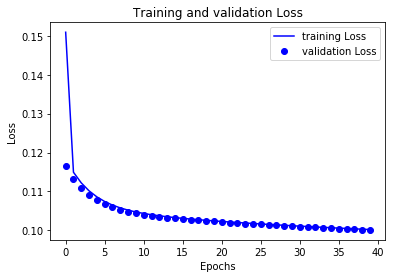

In [156]:
plots(loss, val_loss, 'Loss', epochs)

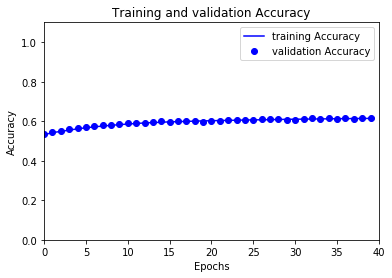

In [157]:
plots(accuracy, val_accuracy, 'Accuracy', epochs)

In [152]:
final_model = 0
final_model = Sequential()
final_model.add(Dense(13, activation='sigmoid', kernel_initializer=initializer, input_shape=(5,)))
final_model.add(Dense(5, activation='linear', kernel_initializer=initializer))
final_model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

final_model.fit(final_data, train_data_label, epochs=80, batch_size=512)

Epoch 1/80
755838/755838 [==============================] - 3s 4us/step - loss: 0.1422 - acc: 0.5335
Epoch 2/80
755838/755838 [==============================] - 2s 3us/step - loss: 0.1134 - acc: 0.5461
Epoch 3/80
755838/755838 [==============================] - 2s 3us/step - loss: 0.1104 - acc: 0.5539
Epoch 4/80
755838/755838 [==============================] - 2s 3us/step - loss: 0.1084 - acc: 0.5627
Epoch 5/80
755838/755838 [==============================] - 2s 3us/step - loss: 0.1069 - acc: 0.5693
Epoch 6/80
755838/755838 [==============================] - 2s 3us/step - loss: 0.1058 - acc: 0.5750
Epoch 7/80
755838/755838 [==============================] - 2s 3us/step - loss: 0.1051 - acc: 0.5798
Epoch 8/80
755838/755838 [==============================] - 2s 3us/step - loss: 0.1045 - acc: 0.5844
Epoch 9/80
755838/755838 [==============================] - 2s 3us/step - loss: 0.1040 - acc: 0.5880
Epoch 10/80
755838/755838 [==============================] - 2s 3us/step - loss: 0.1037 - a

In [153]:
print(final_model.evaluate(final_data_test, test_data_label))

135264/135264 [==============================] - 2s 18us/step
[0.13484674368713775, 0.6420407499408564]
